# Ejercicio 1
En este notebook primero se presenta el código desarrollado para tratar el filtrado inverso como técnica de reconstrucción de imágenes, y por último, se realiza una descripción, análisis y se obtienen conclusiones del desarrollo planteado.

In [114]:
import matplotlib.pyplot as plt

In [115]:
import scipy.io as sio

In [116]:
import numpy as np

In [117]:
# Read the MATLAB generated file
lenna_mat = sio.loadmat('../resources/lenna.mat')

# Extract the image content
img_original = np.double(lenna_mat['lenna']) / 255

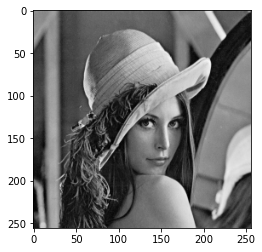

In [118]:
plt.imshow(img_original, cmap='gray')

# Funciones

In [119]:
def get_ideal_lowpass(order, size):
    """ Creates an ideal lowpass 2D filter with the size of the image.
        @param order Order of the kernel or mask
        @param size Size of the image (width, height)
        @return Image sized kernel
    """
    # Extract the width and height from the size parameters
    N, M = size
    
    # Create the kernel
    kernel = np.zeros((N, M))
    n = np.int(order/2)
    m = np.int(M / 2)
    kernel[m-n:m+n+1,m-n:m+n+1] = np.ones((order, order)) / (order**2)
    
    # Return the kernel
    return kernel

In [120]:
def apply_filter(kernel, image):
    """ Apply a 2D filtering to an image in the frequency domain using a kernel.
        with the same size of the image.
        @param kernel Filter kernel or mask
        @param image Image to filter
        @return Resulting image
    """
    image_spectrum = np.fft.fftshift(np.fft.fft2(image))
    kernel_spectrum = np.fft.fftshift(np.fft.fft2(kernel))
    return np.abs(np.fft.fftshift(np.fft.ifft2(image_spectrum * kernel_spectrum)))

In [121]:
def generate_noise(image, snr):
    """ Generates a 2D noise image with a SNR taken relative to the
        provided image.
        @param image Reference image for the power estimation and size settings
        @param snr Signal to Noise Ratio
        @return Noise image
    """
    # Estimate the image standard deviation
    image_std = image.std()
    # Compute the statistical parameters of the noise
    noise_std = np.sqrt(((image_std)**2) * (10**(-snr/10)))
    noise_mean = 0
    # Create the noise image
    return np.random.normal(noise_mean, noise_std, image.shape)

In [122]:
def get_inverse_filter(kernel):
    """ Get the inverse filter of the provided kernel.
        @param kernel Kernel or mask of the image filter
        @return Inverse filter
    """
    return 

In [123]:
def calculate_mse(original, restaured):
    """ Calculates the MSE with the original and the restaured image.
        @param original Original image
        @param restaured Restaured image
        @return Estimation of the MSE
    """
    return (original - restaured).var()

# Restauración de imagen borrosa

#### Versión borrosa

In [124]:
# Calculate an ideal low pass filter
kernel = get_ideal_lowpass(5, img_original.shape)

# Apply a blurr effect to the image
img_blurred = apply_filter(kernel, img_original)

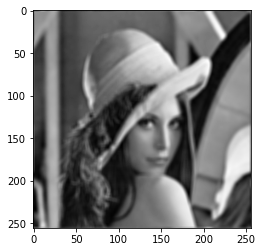

In [125]:
# Plot the image
plt.imshow(img_blurred, cmap='gray')

#### Versión borrosa restaurada con el filtro inverso

In [126]:
# Get the inverse form of the original filter
inverse_filter = 1 / np.fft.fftshift(np.fft.fft2(kernel))

# Calculate the image spectrum
img_blurred_spectrum = np.fft.fftshift(np.fft.fft2(img_blurred))

# Apply the filtering
img_blurred_restauration = np.abs(np.fft.fftshift(np.fft.ifft2(img_blurred_spectrum * inverse_filter)))

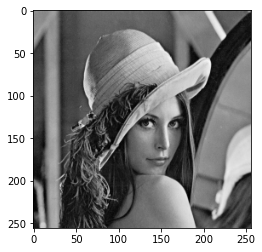

In [127]:
# Plot the image
plt.imshow(img_blurred_restauration, cmap='gray')

In [128]:
calculate_mse(img_original, img_blurred_restauration)

2.774465387727006e-27

# Restauración de imagen borrosa con ruido aditivo

#### Versión borrosa con ruido aditivo

In [129]:
# Calculate a noise image with the configured SNR
snr = 30
noise = generate_noise(img_blurred, snr)

# Create the new degraded image
img_blurred_noise = img_blurred + noise

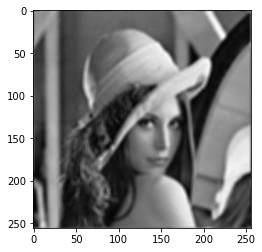

In [130]:
# Plot the iamge
plt.imshow(img_blurred_noise, cmap='gray')

#### Versión borrosa con ruido aditivo restaurada con el filtro inverso

In [131]:
# Calculate the image spectrum
img_blurred_noise_spectrum = np.fft.fftshift(np.fft.fft2(img_blurred_noise))

# Apply the filtering
img_blurred_noise_restauration = np.abs(np.fft.fftshift(np.fft.ifft2(img_blurred_noise_spectrum * inverse_filter)))

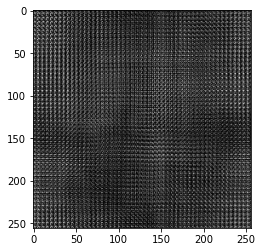

In [132]:
# Plot the image
plt.imshow(img_blurred_noise_restauration, cmap='gray')

In [133]:
calculate_mse(img_original, img_blurred_noise_restauration)

12.308778771352701

# Análisis y conclusiones

Para una imagen original, se utilizó un filtro pasabajos ideal para aplicar un efecto de suavizado sobre la imagen, simulando la degradación resultante por problemas en la captura o en el sistema óptico de la cámara utilizada. Se agregó ruido blanco gaussiano a la imagen, con una potencia tal que mantiene una relación con la imagen original de acuerdo al SNR ensayado.

El enfoque de restauración de imágenes empleado es el **filtro inverso**. Asumiendo completo conocimiento sobre la PSF (transformada Fourier del proceso de degradación que sufre la imagen), se invierte y se aplica el filtro inverso para deconvolucionar la imagen. En primer lugar, se observa que este método aplicado sobre la imagen sólo degradada por el pasabajos resulta ser efectivo, con un error cuadrático medio estimado muy bajo. En segundo lugar, se observa que este método aplicado sobre la imagen degradada por el pasabajos y el ruido, no resulta muy efectivo. En particular, el error cuadrático medio estimado es muy elevado, y la imagen ya no es distinguible. Esto se debe a que el ruido se vio amplificado.

Esto se debe a que en el método del filtro inverso existe el problema de que si el filtrado original presenta valores en magnitud muy bajos para altas frecuencias, al invertirlo se produce una gran amplificación de las componentes espectrales del ruido a alta frecuencia. Resultando en una imagen de salida con un SNR muy bajo, al punto que la imagen deja de ser distinguible y perdió toda información relevante.